<a href="https://colab.research.google.com/github/douglasbarbosadelima/Data-Science/blob/master/deep_iris_X.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Classificação Multiclasse com Iris e TF 2.0

Parte 1: montando e calibrando o modelo

In [1]:
!pip install tensorflow-gpu==2.0.0 #com GPU

     |████████████████████████████████| 380.8MB 41kB/s 
     |████████████████████████████████| 450kB 46.4MB/s 
     |████████████████████████████████| 3.8MB 47.0MB/s 
     |████████████████████████████████| 81kB 12.6MB/s 
ERROR: tensorflow 1.15.0 has requirement tensorboard<1.16.0,>=1.15.0, but you'll have tensorboard 2.0.2 which is incompatible.
ERROR: tensorflow 1.15.0 has requirement tensorflow-estimator==1.15.1, but you'll have tensorflow-estimator 2.0.1 which is incompatible.
ERROR: google-colab 1.0.0 has requirement google-auth~=1.4.0, but you'll have google-auth 1.11.1 which is incompatible.
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found existing installation: google-auth 1.4.2
    Uninstalling google-auth-1.4.2:
      Successfully uninstalled google-auth-1.4.2
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Su

In [1]:
import tensorflow as tf
import numpy as np
print(tf.__version__)

2.0.0


In [2]:
from sklearn import datasets
iris = datasets.load_iris()

X = iris.data
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [3]:
y = iris.target
y[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [4]:
from sklearn.preprocessing import OneHotEncoder
onehot = OneHotEncoder()
y.shape

(150,)

In [9]:
y = y.reshape((150, 1))
y

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
    

In [10]:
y = onehot.fit_transform(y).toarray()
y[:10]

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [0]:
#crie o modelo com duas hidden layers de 4 perceptrons, relu e 3 outputs
#com softmax 
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(2, activation='relu', input_shape=(4,)),
  tf.keras.layers.Dense(2, activation='relu'),
  tf.keras.layers.Dense(3, activation='softmax')
])

#continue o código

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2)                 10        
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 6         
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 9         
Total params: 25
Trainable params: 25
Non-trainable params: 0
_________________________________________________________________


In [15]:
ephocs = 300
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
hist=model.fit(x=X_train,y=y_train, validation_data=(X_test, y_test),epochs=ephocs)
hist

Train on 105 samples, validate on 45 samples
Epoch 1/300
105/105 [==============================] - 2s 18ms/sample - loss: 1.1042 - accuracy: 0.2476 - val_loss: 1.1029 - val_accuracy: 0.2889
Epoch 2/300
105/105 [==============================] - 0s 298us/sample - loss: 1.1011 - accuracy: 0.2571 - val_loss: 1.1004 - val_accuracy: 0.3111
Epoch 3/300
105/105 [==============================] - 0s 261us/sample - loss: 1.0992 - accuracy: 0.1619 - val_loss: 1.0989 - val_accuracy: 0.0889
Epoch 4/300
105/105 [==============================] - 0s 267us/sample - loss: 1.0982 - accuracy: 0.1714 - val_loss: 1.0980 - val_accuracy: 0.3556
Epoch 5/300
105/105 [==============================] - 0s 260us/sample - loss: 1.0973 - accuracy: 0.2952 - val_loss: 1.0974 - val_accuracy: 0.1778
Epoch 6/300
105/105 [==============================] - 0s 239us/sample - loss: 1.0967 - accuracy: 0.1333 - val_loss: 1.0971 - val_accuracy: 0.1778
Epoch 7/300
105/105 [==============================] - 0s 256us/sample - l

Faça o gráfico de acurácia e loss x epochs

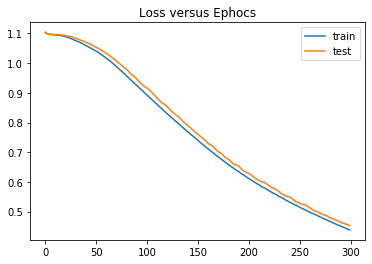

In [18]:
import matplotlib.pyplot as plt

plt.title('Loss versus Ephocs')
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.legend(['train', 'test'])

plt.show()

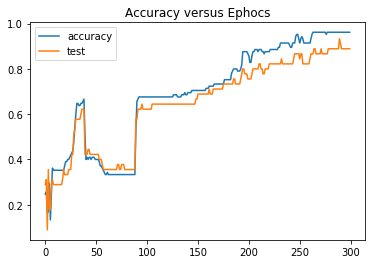

In [21]:
plt.title('Accuracy versus Ephocs')
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.legend(['accuracy', 'test'])

plt.show()

In [22]:
model.predict(X[:1])

array([[0.6373685 , 0.25980306, 0.10282845]], dtype=float32)

In [28]:
model.predict_classes(X[:100])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

Parte 2: montando o modelo com base nos pesos

Usaremos a função ativadora RELU

In [0]:
def relu(x):
  if x<=0:return 0.0
  else: return x

Perceptron

In [0]:
def perceptron(inp,w,b,f):
  return f(np.inner(inp,w)+b)

In [0]:
model.get_weights()

[array([[-0.74580956, -0.19567741],
        [ 0.45900488, -0.02527924],
        [ 0.5814996 ,  0.8346908 ],
        [-0.29675865,  0.84747934]], dtype=float32),
 array([ 0.        , -0.34895247], dtype=float32),
 array([[-0.58017397,  0.08825731],
        [-0.7011869 ,  1.350685  ]], dtype=float32),
 array([ 0.       , -0.3502947], dtype=float32),
 array([[-0.48637426, -0.68442154,  0.5989504 ],
        [-0.603194  ,  0.27456725,  0.43675938]], dtype=float32),
 array([ 0.8821742 , -0.0500871 , -0.65853524], dtype=float32)]

In [0]:
list_w=model.get_weights()
w1=list_w[0]
w1

array([[-0.74580956, -0.19567741],
       [ 0.45900488, -0.02527924],
       [ 0.5814996 ,  0.8346908 ],
       [-0.29675865,  0.84747934]], dtype=float32)